# Extract Part

In [84]:
#Import all dependencies
import pandas as pd
from sqlalchemy import create_engine

In [85]:
#Locate all three CSV files/data sets
confirmed_csv_file = "./Raw Data/time_series_covid19_confirmed_global.csv"
recovered_csv_file = "./Raw Data/time_series_covid19_recovered_global.csv"
deaths_csv_file = "./Raw Data/time_series_covid19_deaths_global.csv"

In [86]:
#Read data set/csv file on confirmed cases and display first 5 rows
confirmed_data_df = pd.read_csv(confirmed_csv_file)
confirmed_data_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [87]:
#Read data set/csv file on recovered cases and display first 5 rows
recovered_data_df = pd.read_csv(recovered_csv_file)
recovered_data_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,0,0,2,2,2,10,17,17,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12,32,32,32,65,65,24,65,29,29
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
#Read data set/csv file on deaths and display first 5 rows
deaths_data_df = pd.read_csv(deaths_csv_file)
deaths_data_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,3,3
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Transform Part

In [89]:
#Import module 
import numpy as np

In [90]:
#Confirm the data are the right data types
confirmed_data_df.dtypes
recovered_data_df.dtypes
deaths_data_df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/23/20             int64
3/24/20             int64
3/25/20             int64
3/26/20             int64
3/27/20             int64
Length: 70, dtype: object

In [91]:
#Create a function to clean the datasets

def clean(df):
    #Drop the "Province/State","Lat" & "Long" columns
    #Select columns of index and "Country/Region", and only dates in March
    #Group by "Country/Region" and caculate the sum value
    #Reset the index of the dataframe
    clean_df = df.drop(columns=['Province/State','Lat','Long']).\
                    iloc[:,np.r_[0:1,40:67]].\
                    groupby('Country/Region').sum().\
                    reset_index()
    return clean_df

In [92]:
#Clean the "confirmed_data_df" dataset
confirmed_clean_df = clean(confirmed_data_df)
confirmed_clean_df

,Country/Region,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,Afghanistan,1,1,1,1,1,1,1,4,4,...,22,22,24,24,40,40,74,84,94,110
1,Albania,0,0,0,0,0,0,0,0,2,...,59,64,70,76,89,104,123,146,174,186
2,Algeria,1,3,5,12,12,17,17,19,20,...,74,87,90,139,201,230,264,302,367,409
3,Andorra,0,1,1,1,1,1,1,1,1,...,39,53,75,88,113,133,164,188,224,267
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Venezuela,0,0,0,0,0,0,0,0,0,...,36,42,42,70,70,77,84,91,107,107
172,Vietnam,16,16,16,16,16,16,18,30,30,...,75,85,91,94,113,123,134,141,153,163
173,West Bank and Gaza,0,0,0,0,4,7,16,16,19,...,41,44,47,48,52,59,59,59,84,91
174,Zambia,0,0,0,0,0,0,0,0,0,...,2,2,2,2,3,3,3,12,16,22


In [93]:
#Clean the "recovered_data_df" dataset
recovered_clean_df = clean(recovered_data_df)
recovered_clean_df

,Country/Region,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,10,17,17,31
2,Algeria,0,0,0,0,0,0,0,0,0,...,12,32,32,32,65,65,24,65,29,29
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Venezuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,15,15,15,15,15,31
172,Vietnam,16,16,16,16,16,16,16,16,16,...,16,16,16,17,17,17,17,17,20,20
173,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,0,0,17,17,17,17,17,17,17,17
174,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
#Clean the "deaths_data_df" dataset
deaths_clean_df = clean(deaths_data_df)
deaths_clean_df

,Country/Region,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4
1,Albania,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8
2,Algeria,0,0,0,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,3,3
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Venezuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
172,Vietnam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
174,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
#Confirm the content of "Country/Region" column are the same in those dataframes
confirmed_clean_df["Country/Region"].equals(deaths_clean_df["Country/Region"])

True

In [96]:
#Same as above
recovered_clean_df["Country/Region"].equals(deaths_clean_df["Country/Region"])

True

In [97]:
#Import module 
import datetime
import os

In [98]:
#Create a function to convert columns of dates into one new column, and sorting the dataset by 'Country/Region' and 'Date'

def convert(clean_df):
    #Convert columns of dates into a new column 'Date', and store the data in a new column 'Number'
    converted = pd.melt(clean_df, id_vars=["Country/Region"], 
                  var_name="Date", value_name="Number")
    #Convert the data type from string to datetime64 for the data in column 'Date' 
    converted['Date'] = pd.to_datetime(converted['Date'])
    #Sort the dataset by "Country/Region" and "Date"
    converted_df = converted.sort_values(by=["Country/Region","Date"])
    
    return converted_df   

In [99]:
#Apply convert function
confirmed_convert_df = convert(confirmed_clean_df)
recovered_convert_df = convert(recovered_clean_df)
deaths_convert_df = convert(deaths_clean_df)


deaths_convert_df

,Country/Region,Date,Number
0,Afghanistan,2020-03-01,0
176,Afghanistan,2020-03-02,0
352,Afghanistan,2020-03-03,0
528,Afghanistan,2020-03-04,0
704,Afghanistan,2020-03-05,0
...,...,...,...
4047,Zimbabwe,2020-03-23,1
4223,Zimbabwe,2020-03-24,1
4399,Zimbabwe,2020-03-25,1
4575,Zimbabwe,2020-03-26,1


In [100]:
#Create a function to calculate the daily increase

def dailychange(convert_df):
    #Change the index in order to apply diff() function
    convert_df = convert_df.set_index(['Country/Region','Date'])
    
    #Create a new column to store the difference between rows
    convert_df['amount_of_increase']=convert_df.diff()
    
    #Change back the index
    convert_df=convert_df.reset_index()
    
    #Run a for loop to check the boundary rows where the 'Country' changes, and change the value of difference to 0
    for i in range(0,int(convert_df.index.size)-1):
        if convert_df['Country/Region'][i] != convert_df['Country/Region'][i+1]:
            convert_df.at[i+1,'amount_of_increase'] = 0
        else:
            pass
    
    #Fill all NaN with 0
    convert_df=convert_df.fillna(0)
    
    return convert_df

In [101]:
#Apply the function
confirmed_daily_df = dailychange(confirmed_convert_df)
recovered_daily_df = dailychange(recovered_convert_df)
deaths_daily_df = dailychange(deaths_convert_df)

deaths_daily_df

,Country/Region,Date,Number,amount_of_increase
0,Afghanistan,2020-03-01,0,0.0
1,Afghanistan,2020-03-02,0,0.0
2,Afghanistan,2020-03-03,0,0.0
3,Afghanistan,2020-03-04,0,0.0
4,Afghanistan,2020-03-05,0,0.0
...,...,...,...,...
4747,Zimbabwe,2020-03-23,1,1.0
4748,Zimbabwe,2020-03-24,1,0.0
4749,Zimbabwe,2020-03-25,1,0.0
4750,Zimbabwe,2020-03-26,1,0.0


In [102]:
#Rename the columns
confirmed_daily_df.columns=['country','date','accumulated_confirmed','increase_of_confirmed']
recovered_daily_df.columns=['country','date','accumulated_recovered','increase_of_recovered']
deaths_daily_df.columns=['country','date','accumulated_deaths','increase_of_deaths']

In [103]:
# Turning the last colum of each DataFrame into an integer

confirmed_daily_df["increase_of_confirmed"] = confirmed_daily_df["increase_of_confirmed"].astype(int)
recovered_daily_df["increase_of_recovered"] = recovered_daily_df["increase_of_recovered"].astype(int) 
deaths_daily_df["increase_of_deaths"] = deaths_daily_df["increase_of_deaths"].astype(int)

In [104]:
#Export datasets
confirmed_daily_df.to_csv(os.path.join('clean_data','confirmed_clean_df.csv'), index=False)
recovered_daily_df.to_csv(os.path.join('clean_data','recovered_clean_df.csv'), index=False)
deaths_daily_df.to_csv(os.path.join('clean_data','deaths_clean_df.csv'), index=False)

# Load

In [105]:
# Importing the recently made csv files

confirmed_cleaned_csv_path = os.path.join('clean_data','confirmed_clean_df.csv')
recovered_cleaned_csv_path = os.path.join('clean_data','recovered_clean_df.csv')
deaths_cleaned_csv_path = os.path.join('clean_data','deaths_clean_df.csv')

# Applying the paths to their respective data frames

confirmed_cleaned_df = pd.read_csv(confirmed_cleaned_csv_path)
recovered_cleaned_df = pd.read_csv(recovered_cleaned_csv_path)
deaths_cleaned_df = pd.read_csv(deaths_cleaned_csv_path)

# Sanity Checking
print(confirmed_cleaned_df)
print("----------------------------------------------------------------------------------------")
print(recovered_cleaned_df)
print("----------------------------------------------------------------------------------------")
print(deaths_cleaned_df)

          country        date  accumulated_confirmed  increase_of_confirmed
0     Afghanistan  2020-03-01                      1                      0
1     Afghanistan  2020-03-02                      1                      0
2     Afghanistan  2020-03-03                      1                      0
3     Afghanistan  2020-03-04                      1                      0
4     Afghanistan  2020-03-05                      1                      0
...           ...         ...                    ...                    ...
4747     Zimbabwe  2020-03-23                      3                      0
4748     Zimbabwe  2020-03-24                      3                      0
4749     Zimbabwe  2020-03-25                      3                      0
4750     Zimbabwe  2020-03-26                      3                      0
4751     Zimbabwe  2020-03-27                      5                      2

[4752 rows x 4 columns]
---------------------------------------------------------------

In [110]:
from sqlalchemy import create_engine
connection_string = "postgres:Inspireanother7!@localhost:5432/covid19_db"
engine = create_engine(f'postgresql://{connection_string}')


In [111]:
# Confirm tables
engine.table_names()

['confirmed', 'recovered', 'death']

In [112]:
confirmed_cleaned_df.to_sql(name='confirmed', con=engine, if_exists='append', index=False)
recovered_cleaned_df.to_sql(name='recovered', con=engine, if_exists='append', index=False)
deaths_cleaned_df.to_sql(name='death', con=engine, if_exists='append', index=False)

In [143]:
#5 countries with the highest number of recoveries
high_recoveries = pd.read_sql("SELECT country, SUM(increase_of_recovered) AS total_recovered FROM recovered GROUP BY country ORDER BY SUM(increase_of_recovered) DESC LIMIT 5", con=engine)
high_recoveries

,country,total_recovered
0,China,32558
1,Iran,10958
2,Italy,10867
3,Spain,9355
4,Germany,6642


In [144]:
#5 countries with the lowest number of recoveries
low_recoveries = pd.read_sql("SELECT country, SUM(increase_of_recovered) AS total_recovered FROM recovered GROUP BY country ORDER BY SUM(increase_of_recovered) ASC LIMIT 5", con=engine)
low_recoveries

,country,total_recovered
0,Laos,0
1,Uganda,0
2,Papua New Guinea,0
3,Montenegro,0
4,Grenada,0


In [145]:
#Date in March with the highest number of recoveries

high_recovery_date = pd.read_sql("SELECT recovered.country, recovered.date, SUM(increase_of_recovered) AS total_recovered FROM recovered GROUP BY country, date ORDER BY SUM(increase_of_recovered) DESC LIMIT 1", con=engine)
high_recovery_date

,country,date,total_recovered
0,Germany,2020-03-24,2977


In [146]:
#Date in March with the highest number of confirmed cases
high_confirmed_date = pd.read_sql("SELECT confirmed.country, confirmed.date, SUM(confirmed.increase_of_confirmed) AS total_confirmed FROM confirmed GROUP BY confirmed.country, confirmed.date ORDER BY SUM(increase_of_confirmed) DESC LIMIT 1", con=engine)
high_confirmed_date

,country,date,total_confirmed
0,US,2020-03-26,18058


In [147]:
#Date in March with the highest number of deaths
high_death_date = pd.read_sql("SELECT country, date, SUM(increase_of_deaths) AS total_deaths FROM death GROUP BY country, date ORDER BY SUM(increase_of_deaths) DESC LIMIT 1", con=engine)
high_death_date

,country,date,total_deaths
0,Italy,2020-03-27,919


In [129]:
pd.read_sql("SELECT confirmed.country, confirmed.date, SUM(confirmed.increase_of_confirmed) AS total_confirmed, SUM(recovered.increase_of_recovered) AS total_recovered, SUM(death.increase_of_deaths) AS total_deaths FROM confirmed INNER JOIN death ON confirmed.country=death.country AND confirmed.date=death.date INNER JOIN recovered ON recovered.country=confirmed.country AND recovered.date=confirmed.date GROUP BY confirmed.country, confirmed.date", con=engine)

,country,date,total_confirmed,total_recovered,total_deaths
0,Bahamas,2020-03-04,0,0,0
1,Iceland,2020-03-08,0,0,0
2,Spain,2020-03-04,57,0,1
3,Brazil,2020-03-16,38,1,0
4,Thailand,2020-03-11,6,1,0
...,...,...,...,...,...
4747,Vietnam,2020-03-11,7,0,0
4748,Bahrain,2020-03-27,8,23,0
4749,Barbados,2020-03-09,0,0,0
4750,Madagascar,2020-03-23,9,0,0


In [151]:
  %matplotlib inline

In [152]:
import matplotlib.pyplot as plt
import numpy as np

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DB66E1688>],
      dtype=object)

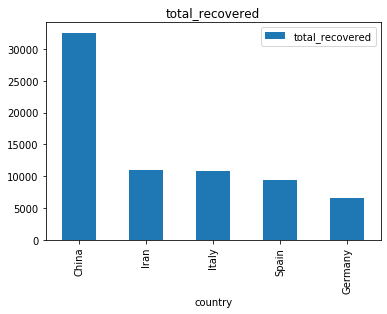

In [153]:
# high_recoveries.plot.bar(x='country',y='total_recovered', subplots=True)

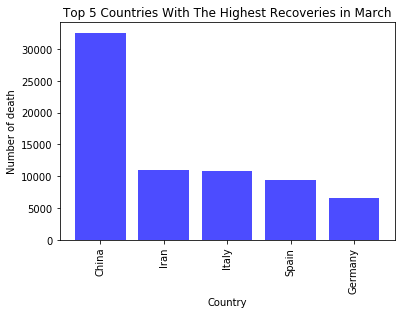

In [159]:
#Convert result from sql query into dataframe
most_death_df = pd.DataFrame(high_recoveries)

#plot bar graph
fig, ax = plt.subplots()
ax.bar(high_recoveries['country'], high_recoveries['total_recovered'], color='blue', alpha=0.7, align="center");
ax.set_xlabel("Country");
ax.set_ylabel("Number of death");
ax.set_title("Top 5 Countries With The Highest Recoveries in March");
ax.set_xticklabels(high_recoveries['country'], rotation="vertical");

import os
path = os.path.join(os.path.expanduser("~"), "Desktop","Projects","ETL-Project-2","03 - Load","high_recoveries.png")
path
fig.savefig(path,bbox_inches = 'tight')